We're trying to propose a bus schedule that ensures social-distancing while trying to keep the cost low. We have the number of passangers per day per hour. 



We first start off reading the file and preparing the data for use:

In [ ]:
# Read the csv file
if os.path.exists("passengerData.csv"): 
    data = pd.read_csv("passengerData.csv")

In [ ]:
data.head()

,Unnamed: 0,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm
0,14-Jun,24,25,21,10,2,9,6,6,8,6,16,8,17,13,17,15
1,15-Jun,24,22,25,6,9,8,5,6,7,3,10,11,12,12,9,10
2,16-Jun,23,21,29,3,7,10,4,7,5,8,20,15,13,17,10,12
3,17-Jun,17,19,20,10,11,3,2,7,6,6,16,10,18,12,14,14
4,18-Jun,22,27,26,3,9,5,1,7,6,9,16,14,15,13,11,11


The figure above indicates that a Poisson distribution might be used. This distribution gives the probability of the different possible number of occurrences of an event in a given time interval under certain conditions. Our assumptions to use this distribution are as follows:

The events occur independently: We will consider the number of passangers as independent form each other.

The events occur at random: This is perhaps the most important assumption, since the number of passangers on a bus might be more systematic then at random, concerning people's schedules. However, for the sake of this experiment, we will consider them random.

In this case, the given time interval is one hour. An event is a passenger boarding the bus. 




It would be good to model the arrival of passengers to the bus stop for each hour; although the sample size would be small, the results will be clearer to justify. Poisson distribution therefore would be a good fit, considering how we can adjust the model for small time intervals.

In [ ]:
#Prepare data
titles = []
for column in data:
  titles.append(column)
titles.pop(0)

'Unnamed: 0'

In [ ]:
#Organize data by hour
da = []
for i in range(16):
  title = titles[i]
  da.append(data[title].to_numpy())

Following cell provides us with the average number of passangers for each hour:

In [ ]:
poisson_lambda = np.mean(data)
print (poisson_lambda)

7am     21.066667
8am     21.033333
9am     21.666667
10am     7.433333
11am     7.133333
12pm     6.966667
1pm      6.800000
2pm      7.433333
3pm      6.333333
4pm      6.433333
5pm     14.066667
6pm     14.366667
7pm     15.100000
8pm     14.166667
9pm     12.766667
10pm    12.966667
dtype: float64


Looking at it, we can see that 7am to 9am (included) have very close means, same goes for 10am to 4pm (included), and so on. The mean number of passengers per hour vary, hence we are treating each hour seperately.

The following plots will show the number of passengers throughout the given days. Each plot is labeled by the hour it represents:

In [ ]:
days = []
for i in range(30):
  days.append(i)

7am


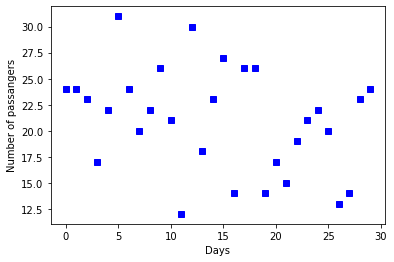

8am


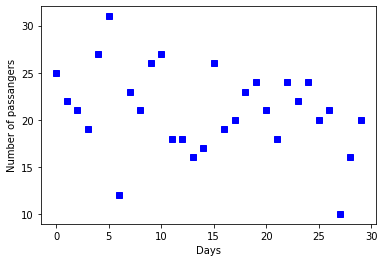

9am


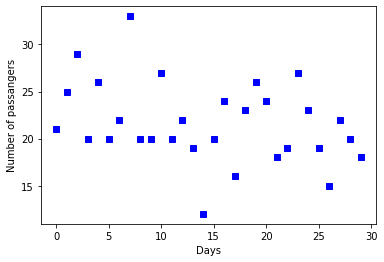

10am


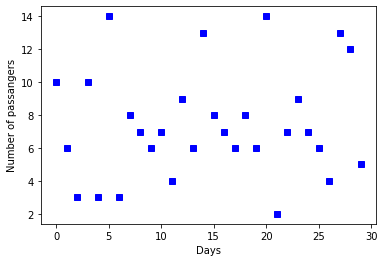

11am


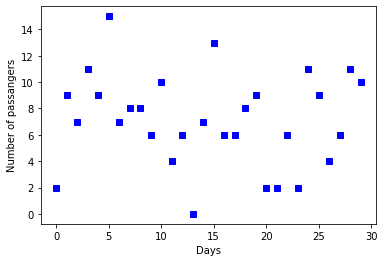

12pm


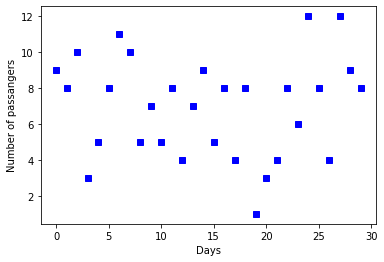

1pm


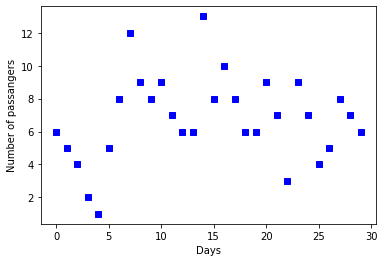

2pm


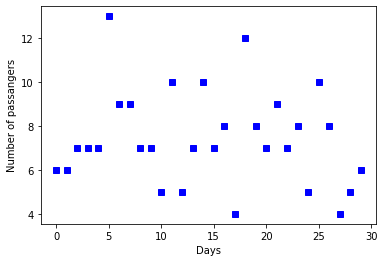

3pm


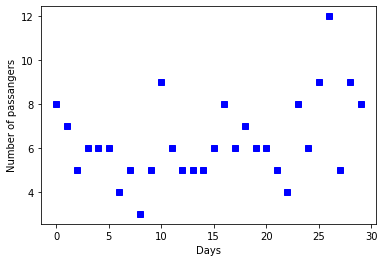

4pm


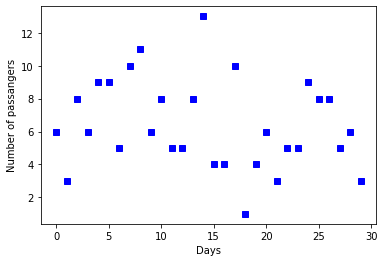

5pm


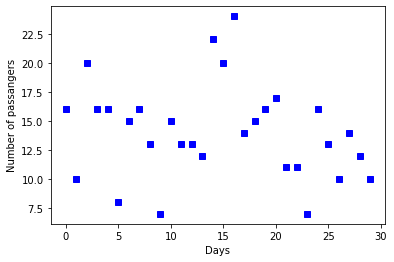

6pm


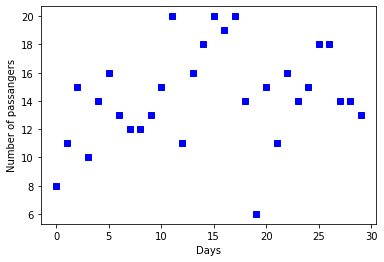

7pm


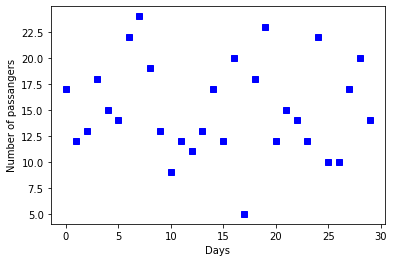

8pm


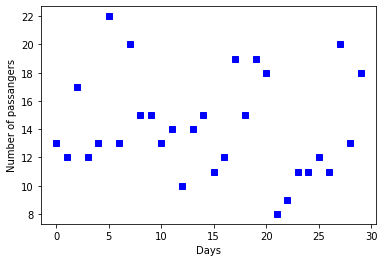

9pm


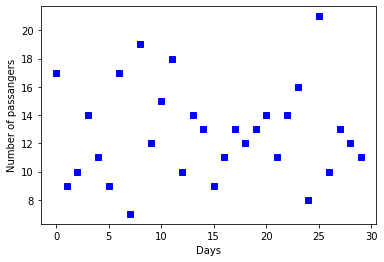

10pm


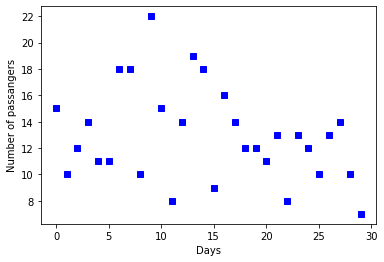

In [ ]:
for i in range(16):
  print(titles[i])
  x = da[i]
  plt.plot(days, x, 'bs')
  plt.ylabel('Number of passangers') 
  plt.xlabel('Days')
  plt.show()

As we can see from above, the days do not give us a useful trend with the number of passengers. Therefore, we will solely focus on the number of passengers against the time intervals.

The probability that there are x occurrences in a given interval is given by the formula:

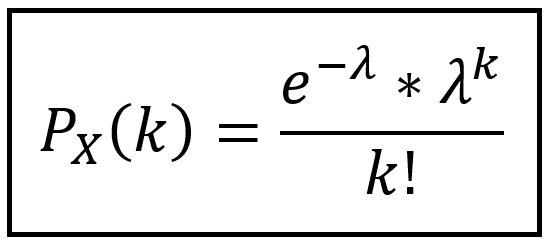

The following code snippet implements the formula, with λ as the mean of respective hours, and it calculates the probabilities and expected frequencies for each hour.

7am


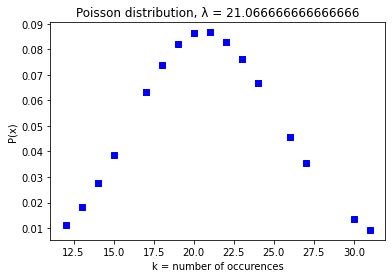

8am


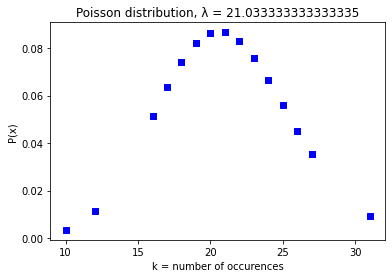

9am


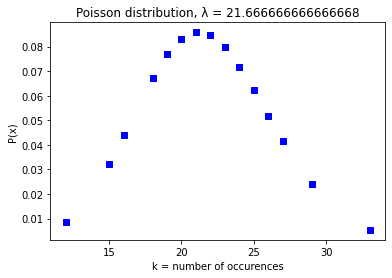

10am


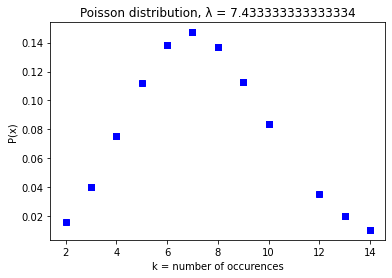

11am


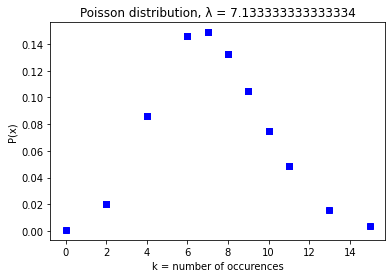

12pm


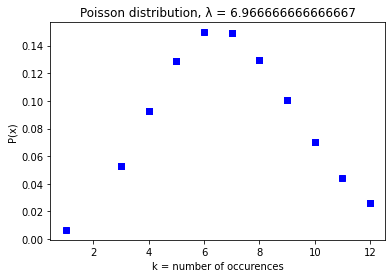

1pm


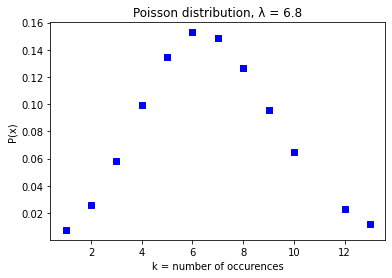

2pm


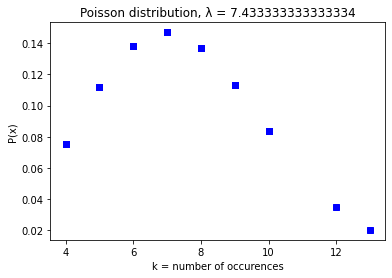

3pm


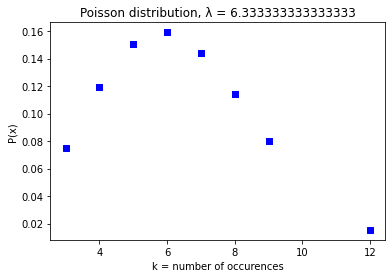

4pm


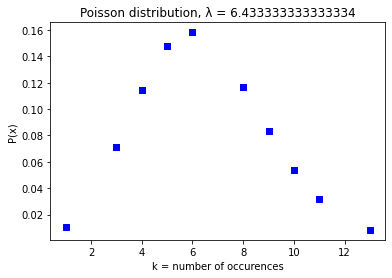

5pm


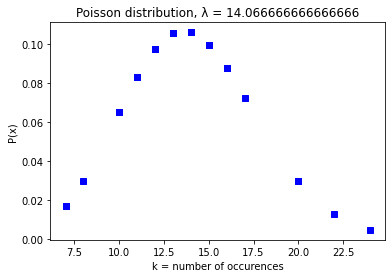

6pm


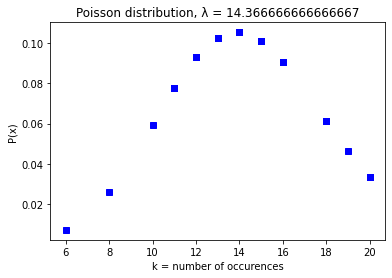

7pm


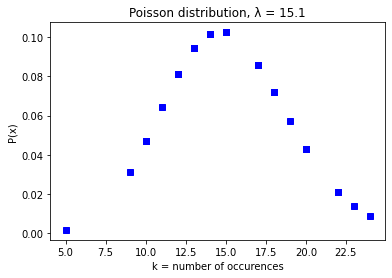

8pm


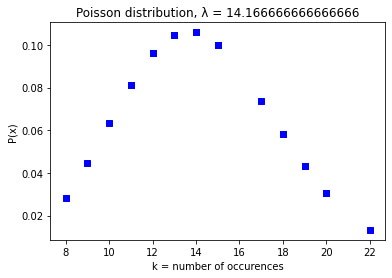

9pm


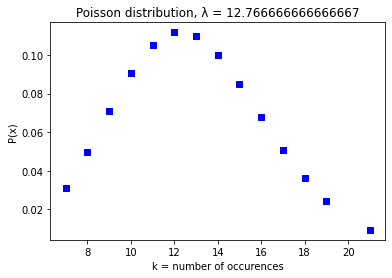

10pm


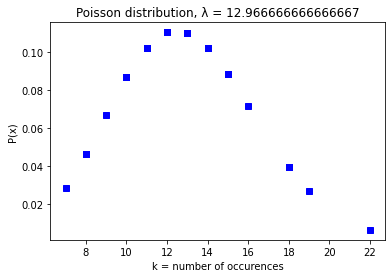

In [ ]:
from scipy.special import factorial
from scipy.stats import poisson
for i in range(16):
  print(titles[i])
  t = da[i]
  d = np.exp(-poisson_lambda[i])*np.power(poisson_lambda[i], t)/factorial(t)
  plt.plot(t, d, 'bs')
  plt.title('Poisson distribution, λ = %s' % (poisson_lambda[i]))
  plt.ylabel('P(x)') 
  plt.xlabel('k = number of occurences')
  plt.show()

The first graph represents the probability of k passengers in one hour given that an average of nearly 21 passengers board the bus per hour. Same goes for the rest of the graphs, their difference is that they represent different hours in a day. Looking at the last graph, we can conclude that at 10pm, the probability of having 8 passengers is close to 0.04, and so on. To get the exact probabilities, we only need to use a formula.

CDF of the number of passengers in a Poisson process:

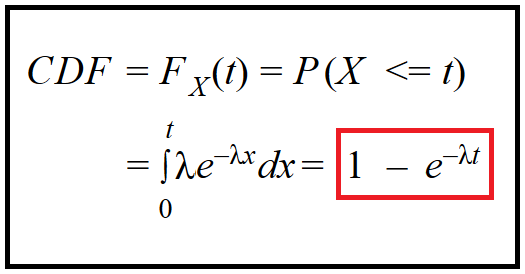

Because the CDF of X returns the probability that the number of passengers will be less than or equal to some value t, we can use this to ensure at most 10 passengers with probability of at least 90%. 

In [ ]:
for i in range(16):
  prob = poisson.cdf(10, poisson_lambda[i]) #the parameters are t, and lambda respectively
  print("The probability of 10 or less passengers at %s is: %s" % (titles[i], prob))

The probability of 10 or less passengers at 7am is: 0.006022583888152868
The probability of 10 or less passengers at 8am is: 0.006135756921624337
The probability of 10 or less passengers at 9am is: 0.004292650877999536
The probability of 10 or less passengers at 10am is: 0.867896154124826
The probability of 10 or less passengers at 11am is: 0.8917450468473357
The probability of 10 or less passengers at 12pm is: 0.9038284055815995
The probability of 10 or less passengers at 1pm is: 0.9150660945434036
The probability of 10 or less passengers at 2pm is: 0.867896154124826
The probability of 10 or less passengers at 3pm is: 0.9420428309743756
The probability of 10 or less passengers at 4pm is: 0.9368130989213878
The probability of 10 or less passengers at 5pm is: 0.1713044053473504
The probability of 10 or less passengers at 6pm is: 0.15263292313803992
The probability of 10 or less passengers at 7pm is: 0.11368381162628226
The probability of 10 or less passengers at 8pm is: 0.16489563900295

In the cell above, we've found the probabilities for each hour. Now, we take into account of the hours that had the value of at least 0.9 at 10:  

In [ ]:
for i in range(16):
  prob = poisson.cdf(10, poisson_lambda[i])
  if (prob >= 0.9):
    print("%s with probability: %s" % (titles[i], prob))

12pm with probability: 0.9038284055815995
1pm with probability: 0.9150660945434036
3pm with probability: 0.9420428309743756
4pm with probability: 0.9368130989213878


The hours 12pm, 1pm, 3pm, and 4pm seem perfectly fine for the desired schedule. Now, we should adjust the rate for the hours that could not reach the 0.9. 

**Step 1**
The first thing to notice is that 10am, 11am, and 2pm are not very far from the expected mark. Therefore, we should suggest a schedule that will adjust the lambda for the hours 10am, 11am and 2pm: poisson_lamda$[i] * 0.9$

Which will result in:

10am with probability: 0.9220185109419287

11am with probability: 0.9375275422702273

2pm with probability: 0.9220185109419287

**Step 2**
Next thing to do is to modify the schedule so that it will ensure 9pm and 10pm is also fixed. This can be achieved by cutting the time in half, assuming the poisson_lambda will decrease at the same rate, which would make:

9pm with probability: 0.9394649998706096

10pm with probability: 0.934086660045877

**Step 3** 
Cutting the time by 0.4 will result in hours 5pm, 6pm, 7pm, and 8pm to reach the desired mark:

5pm with probability: 0.9709449642881116

6pm with probability: 0.966978739692533

7pm with probability: 0.9557048516749275

8pm with probability: 0.9696628981642544

**Step 4**
There is only 3 hours left: the first three. Since these hours are the most crowded, it only makes sense that cutting their time short would result in less passengers, therefore help fixing the schedule. For them, we should multiply their lambdas with 0.3 to achieve the 90%. This would give us:

7am with probability: 0.9427178081634325

8am with probability: 0.943220614827675

9am with probability: 0.9331612097541965

Overall, the recommended frequency of buses is:

18 minutes from 7am to 10am,

54 minutes from 10am to 12pm,

1 hour from 12pm to 2pm,

54 minutes from 2pm to 3pm,

1 hour from 3pm to 5pm,

24 minutes from 5pm to 9pm,

30 minutes from 9pm to 10pm.
